Измалкова Дарья

# Домашнее задание №1

In [1]:
import pandas as pd
import numpy as np
import re

# для обработки текста
import spacy
import nltk
from nltk.corpus import stopwords


# векторайзеры, модели, метрики
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, classification_report, f1_score, accuracy_score, r2_score

# визуализация
from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [9]:
df = pd.read_csv('Shoes_Data.csv')

In [10]:
print(df.columns)
df.head()

Index(['title', 'price', 'rating', 'total_reviews', 'product_description',
       'reviews', 'reviews_rating', 'Shoe Type'],
      dtype='object')


,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


## Препросессинг

Взяла spacy для лемматизации, потому что он точнее, например, Wordnet-а.


Spacy не убирает пунктуацию, не приводит к нижнему регистру(если нет леммы), но TfidfVectorizer()и CountVectorizer это делают, поэтому на данном этапе только убираю эмодзи, не-латиницу, стоп слова и лемматизирую. 

In [11]:
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

def lemmatize(text):
    tokens = nlp(text)
    lemmas = ' '.join([word.lemma_ for word in tokens
                      if word.lemma_ not in stop_words and word.lemma_.isascii()])
    return lemmas

## Предсказать цену по описанию товара (для каждого товара)

Нужно убрать значок валюты из цены и привести ее к числовому виду, описания лемматизирую.

In [12]:
df['product_description'] = df['product_description'].apply(lemmatize)

In [13]:
df['price'] = df['price'].apply(lambda x: float(x.strip('₹')))

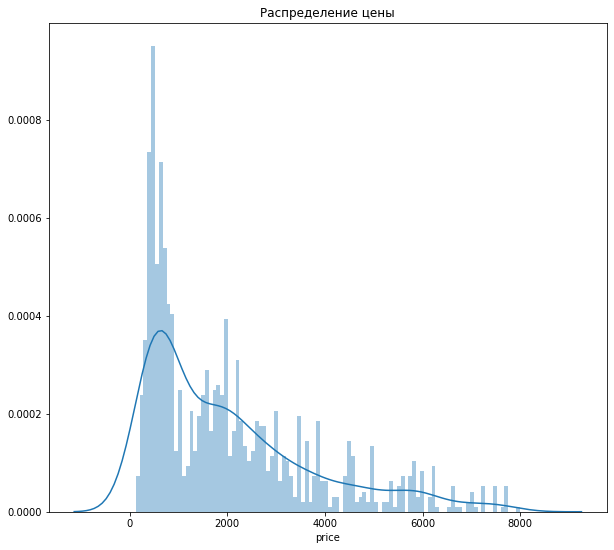

In [14]:
plt.figure(figsize=(10, 9))
plt.title('Распределение цены')
sns.distplot(df['price'], bins=100)
plt.show()

In [15]:
temp_df = df.drop_duplicates()

Если убрать дубликаты, распределение сильно не меняется, при этом оно слегка более перекошенное в сторону дешевых товаров. Поэтому, дубликаты оставлю.

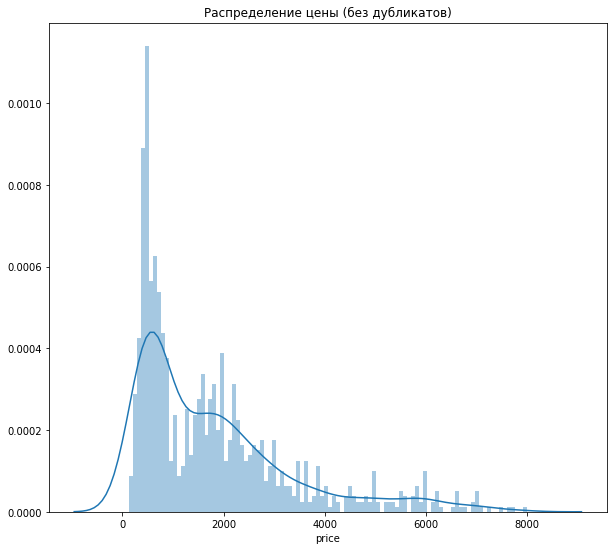

In [16]:
plt.figure(figsize=(10, 9))
plt.title('Распределение цены (без дубликатов)')
sns.distplot(temp_df['price'], bins=100)
plt.show()

In [158]:
len(temp_df)

982

In [17]:
X = df['product_description'].to_list()
y = df['price'].to_list()

Испытаем несколько моделей, сначала векторизуя с помощью Tf-idf, потом с помощью Bag of Words.

### TF-IDF

In [18]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(X).todense()

In [19]:
BoW = CountVectorizer()
BoW_matrix = BoW.fit_transform(X).todense()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, 
                                                    df['price'].values,
                                                    test_size = 0.2, 
                                                    random_state=42)

In [21]:
X1_train, X1_test, y1_train, y1_test = train_test_split(BoW_matrix, 
                                                    df['price'].values,
                                                    test_size = 0.2, 
                                                    random_state=42)

In [22]:
def regr_metrics(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = mean_squared_error(true, predicted, squared=False)
    r2 = r2_score(true, predicted)
    print('mse:', mse)
    print('mae:', mae)
    print('rmse:', rmse)
    print('r2:', r2)

#### Linear regression

In [23]:
linr = LinearRegression()
linr.fit(X_train, y_train)
y_pred = linr.predict(X_test)


In [24]:
regr_metrics(y_test, y_pred)

mse: 1.8664643986872882e+27
mae: 12791616331208.209
rmse: 43202597128960.76
r2: -6.79822015288965e+20


#### Lasso


In [25]:
las = Lasso()
gs = GridSearchCV(las,
                 param_grid = {
                     'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]
                 },
                  scoring='r2')

lasso = gs.fit(X_train, y_train)
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8940466.575963378, tolerance: 239319.04453972002
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4969370.807063803, tolerance: 237761.95959114825
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9234187.256629676, tolerance: 243946.60741124206
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not c

Best score: 0.5290760125001706
Best parameters: {'alpha': 0.03}


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2505019.8242156804, tolerance: 299425.20311457186
  positive)


In [26]:
y_pred = lasso.predict(X_test)
regr_metrics(y_test, y_pred)

mse: 1385396.5586668602
mae: 729.1843639891474
rmse: 1177.0286991687417
r2: 0.4953972434996887


#### Ridge


In [28]:
rid = Ridge()
gs = GridSearchCV(rid,
                 param_grid = {
                     'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]
                 },
                  scoring='r2')

ridge = gs.fit(X_train, y_train)
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

Best score: 0.05189201311421678
Best parameters: {'alpha': 200}


In [29]:
y_pred = ridge.predict(X_test)
regr_metrics(y_test, y_pred)

mse: 2570700.8272280362
mae: 1293.1635442672418
rmse: 1603.3405212954722
r2: 0.06367406830781286


#### ElasticNet


In [31]:
en = ElasticNet()
gs = GridSearchCV(en,
                  param_grid = {
                     "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1),
                 },
                 scoring='r2')

elastic = gs.fit(X_train, y_train)
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114952197.62469162, tolerance: 239319.04453972002
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109859290.20998257, tolerance: 237761.95959114825
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119046743.85902415, tolerance: 243946.60741124206
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did no

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90072910.40947667, tolerance: 249204.59055563924
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83757777.94701518, tolerance: 239319.04453972002
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77559446.20083559, tolerance: 237761.95959114825
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not c

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37257269.35691456, tolerance: 227207.34050318995
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22116734.38737458, tolerance: 249204.59055563924
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 770108349.5189625, tolerance: 239319.04453972002
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not c

Best score: 0.674808122807769
Best parameters: {'alpha': 0.001, 'l1_ratio': 0.7000000000000001}


In [32]:
y_pred = elastic.predict(X_test)
regr_metrics(y_test, y_pred)

mse: 842861.127665584
mae: 612.4681796478741
rmse: 918.074685232952
r2: 0.6930048326550761


###  Bag of words

#### Linear regression

In [34]:
linr = LinearRegression()
linr.fit(X1_train, y1_train)
y_pred = linr.predict(X1_test)

In [35]:
regr_metrics(y1_test, y_pred)

mse: 9.171679893796193e+27
mae: 16109763845514.5
rmse: 95768887921893.47
r2: -3.340599431401452e+21


#### Lasso


In [36]:
las = Lasso()
gs = GridSearchCV(las,
                 param_grid = {
                     'alpha': [0.02, 0.024, 0.025, 0.026, 0.03]
                 },
                  scoring='r2')

lasso = gs.fit(X1_train, y1_train)
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58456698.02815225, tolerance: 239319.04453972002
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51624230.93326025, tolerance: 237761.95959114825
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51685309.803451255, tolerance: 243946.60741124206
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not 

Best score: -0.4176935856090955
Best parameters: {'alpha': 0.03}


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77535004.67077152, tolerance: 299425.20311457186
  positive)


In [37]:
y1_pred = lasso.predict(X1_test)
regr_metrics(y1_test, y1_pred)

mse: 6144351.6017867
mae: 1169.5666921067386
rmse: 2478.780264926018
r2: -1.23795615469998


#### Ridge


In [38]:
rid = Ridge()
gs = GridSearchCV(rid,
                 param_grid = {
                     'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]
                 },
                  scoring='r2')

ridge = gs.fit(X1_train, y1_train)
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

Best score: 0.4641497346242157
Best parameters: {'alpha': 200}


In [39]:
y1_pred = ridge.predict(X1_test)
regr_metrics(y1_test, y1_pred)

mse: 1323346.2647480618
mae: 864.2194842095089
rmse: 1150.3678823524506
r2: 0.5179978116599055


#### ElasticNet


In [40]:
en = ElasticNet()
gs = GridSearchCV(en,
                  param_grid = {
                     "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1),
                 },
                 scoring='r2')

elastic = gs.fit(X1_train, y1_train)
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65523003.29530153, tolerance: 239319.04453972002
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60371091.955903456, tolerance: 237761.95959114825
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62135514.92234686, tolerance: 243946.60741124206
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not 

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62284982.77006866, tolerance: 249204.59055563924
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60186912.96054509, tolerance: 239319.04453972002
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54984579.00661985, tolerance: 237761.95959114825
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not c

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84833564.33487937, tolerance: 227207.34050318995
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99085056.23835377, tolerance: 249204.59055563924
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94926934.20555286, tolerance: 239319.04453972002
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not c

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76170621.85992096, tolerance: 243946.60741124206
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63524100.55071375, tolerance: 227207.34050318995
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78014950.16124189, tolerance: 249204.59055563924
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not c

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184614326.8655358, tolerance: 237761.95959114825
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207425866.03973353, tolerance: 243946.60741124206
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177837559.1059277, tolerance: 227207.34050318995
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not 

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95947568.39712037, tolerance: 239319.04453972002
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96013485.42642114, tolerance: 237761.95959114825
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103751153.08891955, tolerance: 243946.60741124206
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not 

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1106730566.65109, tolerance: 237761.95959114825
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1132889311.789275, tolerance: 243946.60741124206
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061113053.4841998, tolerance: 227207.34050318995
  positive)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not c

Best score: 0.610784941977123
Best parameters: {'alpha': 0.1, 'l1_ratio': 0.9}


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54024749.50676894, tolerance: 299425.20311457186
  positive)


In [41]:
y1_pred = elastic.predict(X1_test)
regr_metrics(y1_test, y1_pred)

mse: 986328.0338677955
mae: 660.2814391612524
rmse: 993.1404904985978
r2: 0.6407499054406829


### Выводы:
<br>
<li>Для всех регрессий кроме Ridge лучше TF-IDF векторизация, больше всего ошибок допускает линейная регрессия, меньше всего ElasticNet. </li>
<li>В целом, все модели довльно неточные: я думаю, это связано прежде всего с несбалансированностью выборки - дешевой обуви в несколько раз больше дорогой. </li>
<li>В будущем можно было бы попробовать сбалансировать выборку - убрать часть дешевой обуви и добавить дорогой (видимо, продублировать).</li>

## Предсказать оценку товара пользователем по его отзыву (для каждого отзыва)

Отзывы и оценки представлены в виде цепочек, разделенных "||". Создаю отдельный массив, в котором каждая сторочка - отзыв и оценка.

In [42]:
ratings = []
reviews = []

for list_of_ratings in df['reviews_rating']:
    ratings.extend(list_of_ratings.split('||'))

for list_of_reviews in df['reviews']:
    reviews.extend(list_of_reviews.split('||'))

df2 = pd.DataFrame(list(zip(reviews, ratings)),
               columns =['review', 'rating'])

In [43]:
df2.head()

,review,rating
0,Not happy with product,1.0 out of 5 stars
1,It's not as expected.,1.0 out of 5 stars
2,AVERAGE PRODUCT,3.0 out of 5 stars
3,Pic more beautiful,3.0 out of 5 stars
4,Got damage product. But quality is average fo...,3.0 out of 5 stars


Здесь тоже дубликаты оставим, так как множество оценок и их доля нам не важна, плюс некоторые из них могут вполне быть отзывами к разным товарам (напр. 'Nice' или 'Bad').

Привожу рейтинг к числовому виду

In [44]:
def get_rating(string):
    digit = re.search(r'\d', string)
    return int(digit.group())

In [45]:
df2['rating'] = df2['rating'].apply(get_rating)

Лемматизирую отзывы.

In [46]:
df2['review'] = df2['review'].apply(lambda x: lemmatize(x))

Видно, что есть отзывы вида 'Verified Purchase' и 'Report abuse', которые выглядят как автоматические сообщения системы - уберем.

In [47]:
 df2['review'].value_counts()

  Verified Purchase                                          647
  Report abuse                                               418
  good                                                       392
  good product                                               155
  value money                                                102
  Nice                                                       101
                                                              70
  nice product                                                66
  comfortable                                                 58
  nice shoe                                                   56
Verified Purchase                                             54
  good quality                                                53
  Awesome                                                     49
  good one                                                    45
  Comfortable                                                 44
  nice                   

In [48]:
# некоторые с пробелом в начале
df2 = df2.drop(df2[(df2['review'] == 'Report abuse') | 
    (df2['review'] == 'Verified Purchase') | 
    (df2['review'] == ' Report abuse') | 
    (df2['review'] == ' Verified Purchase')].index)

Видно, что хороших и самых плохих оценок сильно больше других: скорее всего средние оценки будут плохо предсказываться.

In [49]:
df2['rating'].value_counts()

5    4916
4    1846
1    1742
3     852
2     548
Name: rating, dtype: int64

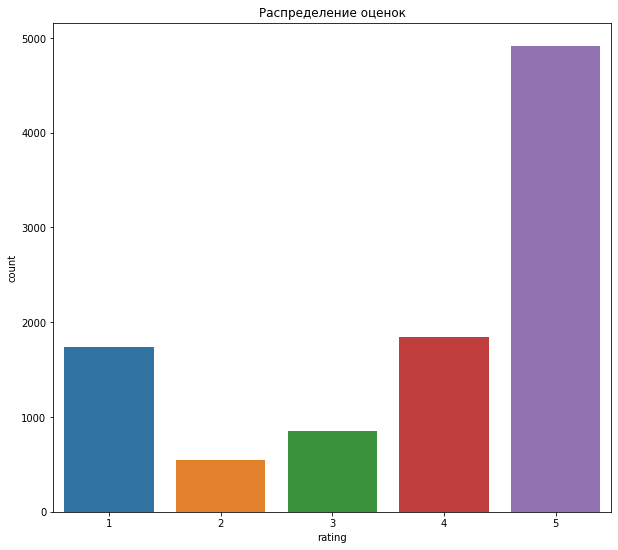

In [50]:
plt.figure(figsize=(10, 9))
plt.title('Распределение оценок')
sns.countplot(df2['rating'])
plt.show()

In [51]:
X = df2['review'].to_list()
y = df2['rating'].to_list()

In [52]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(X).todense()

BoW = CountVectorizer()
BoW_matrix = BoW.fit_transform(X).todense()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, 
                                                    df2['rating'].values,
                                                    test_size = 0.2, 
                                                    random_state=42)

In [54]:
X1_train, X1_test, y1_train, y1_test = train_test_split(BoW_matrix, 
                                                    df2['rating'].values,
                                                    test_size = 0.2, 
                                                    random_state=42)

### TF-IDF

#### Метод ближайшего соседа 

In [55]:
knc = KNeighborsClassifier()

parameter_grid = {'n_neighbors': [2, 3, 5, 10, 20, 30],
                  'weights': ['uniform', 'distance']}

gs = GridSearchCV(knc, param_grid=parameter_grid)
best_knc = gs.fit(X_train, y_train)
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

Best score: 0.6205976962049518
Best parameters: {'n_neighbors': 10, 'weights': 'distance'}


In [56]:
y_pred = best_knc.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.52      0.61       371
           2       0.59      0.28      0.38       109
           3       0.53      0.30      0.39       162
           4       0.54      0.29      0.38       382
           5       0.62      0.89      0.73       957

    accuracy                           0.62      1981
   macro avg       0.60      0.46      0.50      1981
weighted avg       0.62      0.62      0.59      1981



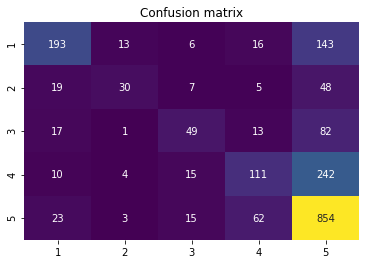

In [58]:
sns.heatmap(data=confusion_matrix(y_test, best_knc.predict(X_test)), cmap='viridis', annot=True, fmt="d", cbar=False, xticklabels=best_knc.classes_, yticklabels=best_knc.classes_)
plt.title("Confusion matrix")
plt.show()

#### Мультиномиальный наивный Байсовский классификатор

In [59]:
mnb = MultinomialNB()
gs = GridSearchCV(mnb,
                 param_grid = {
                     'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]})

best_mnb = gs.fit(X_train, y_train)
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

Best score: 0.6240052735557466
Best parameters: {'alpha': 0.1}


In [60]:
y_pred = best_mnb.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.62      0.66       371
           2       0.31      0.17      0.21       109
           3       0.44      0.28      0.35       162
           4       0.45      0.17      0.25       382
           5       0.65      0.91      0.76       957

    accuracy                           0.62      1981
   macro avg       0.51      0.43      0.45      1981
weighted avg       0.59      0.62      0.58      1981



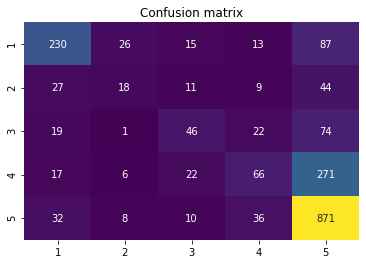

In [62]:
sns.heatmap(data=confusion_matrix(y_test, best_mnb.predict(X_test)), cmap='viridis', annot=True, fmt="d", cbar=False, xticklabels=best_mnb.classes_, yticklabels=best_mnb.classes_)
plt.title("Confusion matrix")
plt.show()

#### Логистическая регрессия

In [63]:
lr = LogisticRegression()

parameter_grid = {'class_weight' : ['balanced', None],
                  'penalty' : ['l2', 'l1'],
                  'solver' : ['liblinear', 'saga'],
                  'C' : [0.001, 0.01, 0.08, 0.1, 0.15, 1.0, 10.0, 100.0],
                 }

gs = GridSearchCV(lr, param_grid=parameter_grid)
best_lr = gs.fit(X_train, y_train)
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model

Best score: 0.630190071057579
Best parameters: {'C': 10.0, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}


In [64]:
y_pred = best_lr.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      0.61      0.65       371
           2       0.36      0.15      0.21       109
           3       0.45      0.30      0.36       162
           4       0.50      0.18      0.27       382
           5       0.64      0.92      0.76       957

    accuracy                           0.63      1981
   macro avg       0.53      0.43      0.45      1981
weighted avg       0.60      0.63      0.58      1981



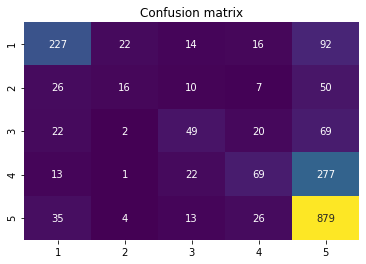

In [66]:
sns.heatmap(data=confusion_matrix(y_test, best_lr.predict(X_test)), cmap='viridis', annot=True, fmt="d", cbar=False, xticklabels=best_lr.classes_, yticklabels=best_lr.classes_)
plt.title("Confusion matrix")
plt.show()

#### Деревья решений

In [67]:
dtc = DecisionTreeClassifier()

parameter_grid = {'splitter' : ['best', 'random'],
                  'max_depth' : [2, 3, 4, 5, 10, 20, 30]}

gs = GridSearchCV(dtc, param_grid=parameter_grid)
best_dtc = gs.fit(X_train, y_train)
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

Best score: 0.574781250995762
Best parameters: {'max_depth': 30, 'splitter': 'random'}


In [68]:
y_pred = best_dtc.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.44      0.55       371
           2       0.73      0.07      0.13       109
           3       0.47      0.16      0.24       162
           4       0.42      0.07      0.12       382
           5       0.56      0.96      0.71       957

    accuracy                           0.58      1981
   macro avg       0.59      0.34      0.35      1981
weighted avg       0.57      0.58      0.50      1981



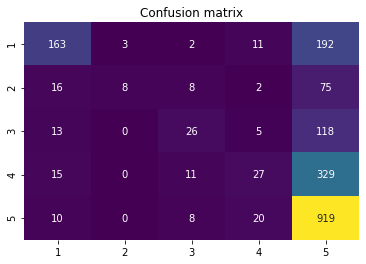

In [70]:
sns.heatmap(data=confusion_matrix(y_test, best_dtc.predict(X_test)), cmap='viridis', annot=True, fmt="d", cbar=False, xticklabels=best_dtc.classes_, yticklabels=best_dtc.classes_)
plt.title("Confusion matrix")
plt.show()

### Bag of Words

#### Метод ближайшего соседа 

In [71]:
knc = KNeighborsClassifier()

parameter_grid = {'n_neighbors': [2, 3, 5, 10, 20, 30],
                  'weights': ['uniform', 'distance']}

gs = GridSearchCV(knc, param_grid=parameter_grid)
best_knc = gs.fit(X1_train, y1_train)
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

Best score: 0.6245094477902049
Best parameters: {'n_neighbors': 20, 'weights': 'distance'}


In [72]:
y1_pred = best_knc.predict(X1_test)

In [73]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           1       0.78      0.53      0.63       371
           2       0.73      0.20      0.32       109
           3       0.63      0.30      0.40       162
           4       0.49      0.29      0.37       382
           5       0.61      0.89      0.73       957

    accuracy                           0.62      1981
   macro avg       0.65      0.44      0.49      1981
weighted avg       0.63      0.62      0.59      1981



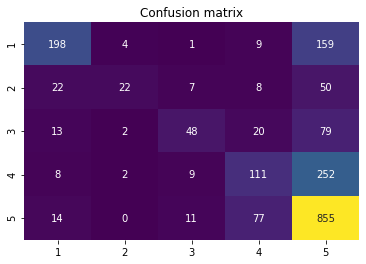

In [74]:
sns.heatmap(data=confusion_matrix(y1_test, best_knc.predict(X1_test)), cmap='viridis', annot=True, fmt="d", cbar=False, xticklabels=best_knc.classes_, yticklabels=best_knc.classes_)
plt.title("Confusion matrix")
plt.show()

#### Мультиномиальный наивный Байсовский классификатор

In [87]:
mnb = MultinomialNB()
gs = GridSearchCV(mnb,
                 param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]})

best_mnb = gs.fit(X1_train, y1_train)
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

Best score: 0.6232478571200969
Best parameters: {'alpha': 0.5}


In [88]:
y1_pred = best_mnb.predict(X1_test)

In [89]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           1       0.68      0.61      0.64       371
           2       0.24      0.11      0.15       109
           3       0.39      0.26      0.31       162
           4       0.45      0.18      0.26       382
           5       0.65      0.90      0.75       957

    accuracy                           0.61      1981
   macro avg       0.48      0.41      0.42      1981
weighted avg       0.57      0.61      0.57      1981



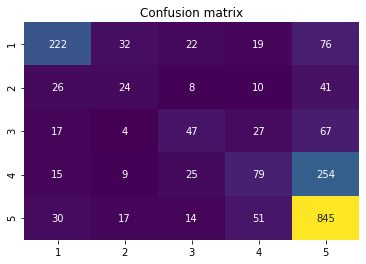

In [78]:
sns.heatmap(data=confusion_matrix(y1_test, best_mnb.predict(X1_test)), cmap='viridis', annot=True, fmt="d", cbar=False, xticklabels=best_mnb.classes_, yticklabels=best_mnb.classes_)
plt.title("Confusion matrix")
plt.show()

#### Логистическая регрессия

In [79]:
lr = LogisticRegression()

parameter_grid = {'class_weight' : ['balanced', None],
                  'penalty' : ['l2', 'l1'],
                  'solver' : ['liblinear', 'saga'],
                  'C' : [0.001, 0.01, 0.08, 0.1, 0.15, 1.0, 10.0, 100.0],
                 }

gs = GridSearchCV(lr, param_grid=parameter_grid)
best_lr = gs.fit(X1_train, y1_train)
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model

Best score: 0.6328398336679093
Best parameters: {'C': 10.0, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [80]:
y1_pred = best_lr.predict(X1_test)

In [81]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           1       0.73      0.62      0.67       371
           2       0.42      0.22      0.29       109
           3       0.50      0.33      0.40       162
           4       0.49      0.20      0.29       382
           5       0.65      0.92      0.76       957

    accuracy                           0.64      1981
   macro avg       0.56      0.46      0.48      1981
weighted avg       0.61      0.64      0.60      1981



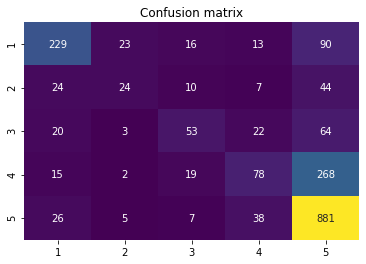

In [82]:
sns.heatmap(data=confusion_matrix(y1_test, best_lr.predict(X1_test)), cmap='viridis', annot=True, fmt="d", cbar=False, xticklabels=best_lr.classes_, yticklabels=best_lr.classes_)
plt.title("Confusion matrix")
plt.show()

#### Деревья решений

In [83]:
dtc = DecisionTreeClassifier()

parameter_grid = {'splitter' : ['best', 'random'],
                  'max_depth' : [2, 3, 4, 5, 10, 20, 30]}

gs = GridSearchCV(dtc, param_grid=parameter_grid)
best_dtc = gs.fit(X1_train, y1_train)
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

Best score: 0.57490576108084
Best parameters: {'max_depth': 30, 'splitter': 'best'}


In [84]:
y1_pred = best_dtc.predict(X1_test)

In [85]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           1       0.76      0.46      0.57       371
           2       0.41      0.06      0.11       109
           3       0.51      0.17      0.26       162
           4       0.45      0.10      0.17       382
           5       0.57      0.96      0.72       957

    accuracy                           0.59      1981
   macro avg       0.54      0.35      0.37      1981
weighted avg       0.57      0.59      0.51      1981



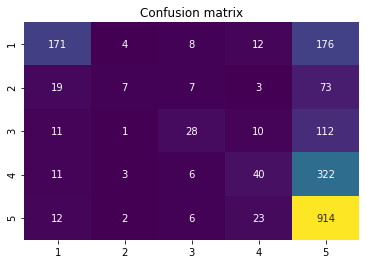

In [86]:
sns.heatmap(data=confusion_matrix(y1_test, best_dtc.predict(X1_test)), cmap='viridis', annot=True, fmt="d", cbar=False, xticklabels=best_dtc.classes_, yticklabels=best_dtc.classes_)
plt.title("Confusion matrix")
plt.show()

### Выводы:
<br>
<li> Худшие результаты покали деревья решений (отстают не сильно от остальных), сильных различий между tf-idf и bag of words не обнаружено, слегка лучше получилось с bag of words. Остальные модели показали примерно одинаковые результаты.</li>
<br>
<li> Во всех моделях меньше всего ошибок при определении нисших и высших оценок, в целом любые оценки имеют тенденцию путаться с 5 звездами (что не удивительно, если вспомнить распределение данных). </li>
<br>
<li> Возможно, можно было бы улучшить классификацию с помощью инструментов для сентимент анализа. Не думаю, что было бы лучше, если вместо оценки отзыва мы брали отзыв и общую оценку товара - все таки, наверное, есть что-то, что может быть характерным для среднего отзыва (то есть не быть просто сочетанием положительного и отрицательного). Может быть другие метрики текста могли бы помочь - можно предположить, что средние отзывы будут длиннее (есть что сказать за и против). Еще, интересно было бы учитывать эмодзи, наверное, есть способ их векторизовать? </li>
 